# `mop` on MERFISH, $p=1$

In [3]:
p=1

In [4]:
# Load datasets using base R
merfish1 <- read.csv("S1.csv")
merfish2 <- read.csv("S2.csv")


# Create matrices
S1 <- as.matrix(merfish1[, c("X", "Y")])
S2 <- as.matrix(merfish2[, c("X", "Y")])


## checkerboard

In [5]:
#create multiscale decompsotions
library(gmra)
gmra1a = gmra.create.ipca(X=S1, eps=0, d=2, maxKids=2)
gmra2a = gmra.create.ipca(X=S2, eps=0, d=2, maxKids=2)

In [6]:
#setup and solve multiscale lp
library(mop)
trp.lp <- multiscale.transport.create.lp(oType=31, transport.type=0, massCost=0, lambda=1)
icprop <- multiscale.transport.create.iterated.capacity.propagation.strategy(1, 0)
multiscale.transport.set.propagation.strategy.1(trp.lp, icprop);
multiscale.transport.add.expand.neighborhood.strategy(trp.lp, 1 )

Loading required package: RColorBrewer



Loading required package: data.table



In [7]:
time1 <- system.time( 
    trp1 <- multiscale.transport.solve(trp.lp, gmra1a, gmra2a, p = p, nType=0, dType=1, scaleMass=FALSE) )

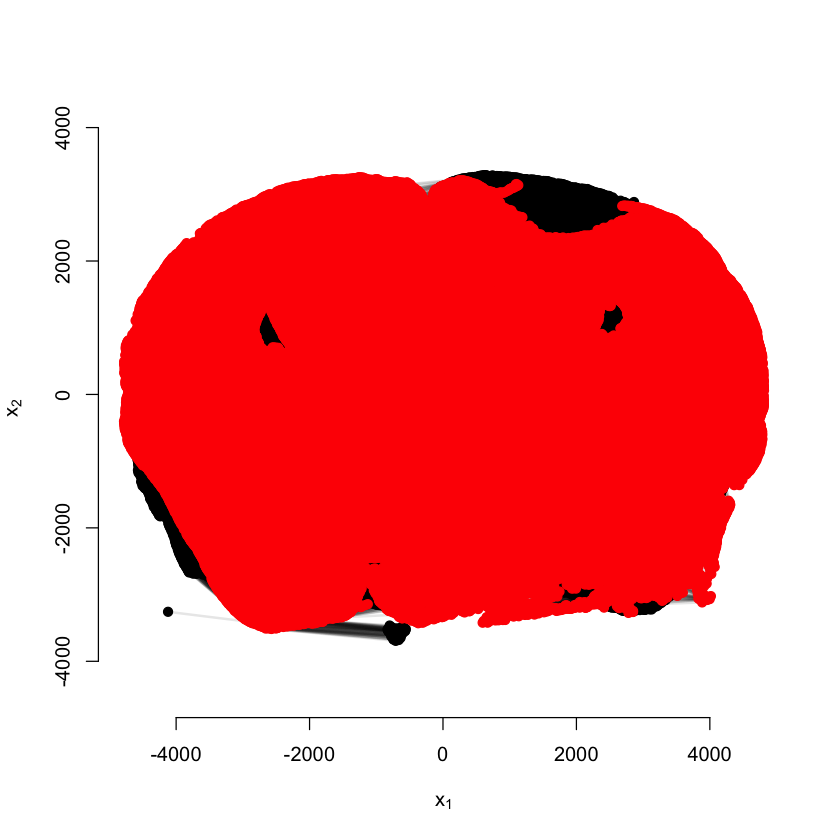

In [8]:
multiscale.transport.plot.map(trp1, 100, mapAlpha=0.1)

In [9]:
num_maps1 <- length(trp1$map)
finest_map1 <- trp1$map[[num_maps1]]
write.csv(finest_map1, file = "mop_map_merfish.csv", row.names = FALSE)

In [15]:
n <- length(finest_map1) / 4

In [18]:
# Assuming S1, S2, and finest_map1 are already defined
map = finest_map1
n = nrow(map)  # Number of mappings
max_distance <- 1.0  # Using your provided value

# Extract indices and weights from map
i_indices <- map[, 1]
j_indices <- map[, 2]
weights <- map[, 3]

# Calculate only the distances needed according to the map
distances <- sqrt(rowSums((S1[i_indices,] - S2[j_indices,])^2))

# Calculate weighted sum
weighted_sum <- sum(weights * distances) / (n * max_distance)
print(paste("MOP (p=1) MERFISH cost:", weighted_sum))

[1] "MOP (p=1) MERFISH cost: 2455.89124380795"


In [16]:
all_distances <- matrix(0, nrow = nrow(S1), ncol = nrow(S2))

for (i in 1:nrow(S1)) {
  for (j in 1:nrow(S2)) {
    all_distances[i, j] <- sqrt(sum((S1[i,] - S2[j,])^2))
  }
}

max_distance <- 1.0 # max(all_distances)

map = finest_map1

# Vectorized approach
i_indices <- map[, 1]
j_indices <- map[, 2]
weights <- map[, 3]

# Calculate all distances
distances <- sqrt(rowSums((S1[i_indices,] - S2[j_indices,])^2))

# Calculate weighted sum
weighted_sum <- sum(weights * distances) / (n * max_distance)

print(paste("MOP (p=1) checkerboard cost:", weighted_sum))

ERROR: Error: vector memory limit of 32.0 Gb reached, see mem.maxVSize()
